# Ford GoBike User Group Analysis
## by Jochen Zanker

## Investigation Overview

With this presentation I want to describe how user groups of FordGoBike in San Francisco are using the service. The exploration aims to outline which groups have used the service to what degree and where is potential for growth. The grouping is defined by the user type (customer or subscriber), gender and age. The analysis is based on the amount and duration of past rides.

## Dataset Overview

The dataset originates from FordGoBike and contains data of around 2.38 million individual rides. The data covers the time span of June 2017 to December 2018. The dataset includes station names, the user type (subscriber or casual user), gender, user’s year of birth, trip duration, start and end time-stamps, start and end stations coordinates/names, as well as bikes and stations IDs. Each row represents a single ride. This set of attributes allows to base the analysis to the action of a ride. Limitation: A basis on the entity of the user is not possible.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike_explain.csv')

In [7]:
# setting some default parameters for visualization.
sb.set_style('whitegrid')
default_color = sb.color_palette()[0]

In [8]:
# percentaged distribution of users
(df.user_type.value_counts(sort=True, normalize=True)*100)

Subscriber    83.610239
Customer      16.389761
Name: user_type, dtype: float64

## Distribution of User Type

84% of all rides have been done by users of the type subscriber.

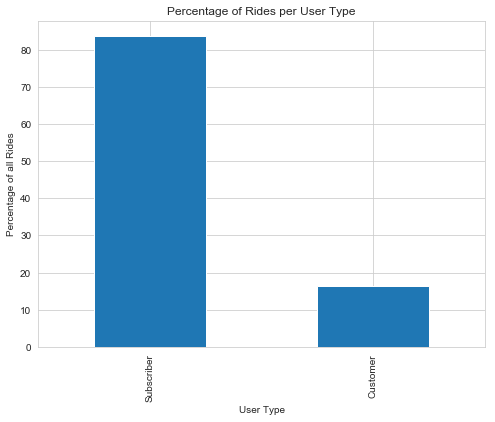

In [9]:
plt.figure(figsize=[8, 6])
(df.user_type.value_counts(sort=True, normalize=True)*100).plot.bar(color = default_color)
plt.title("Percentage of Rides per User Type")
plt.ylabel("Percentage of all Rides")
plt.xlabel("User Type");

In [10]:
# percentaged distribution of gender
(df.member_gender.value_counts(sort=True, normalize=True)*100)

Male      74.159745
Female    24.327515
Other      1.512740
Name: member_gender, dtype: float64

## Distribution of Gender

74% of all rides have been done by male users.

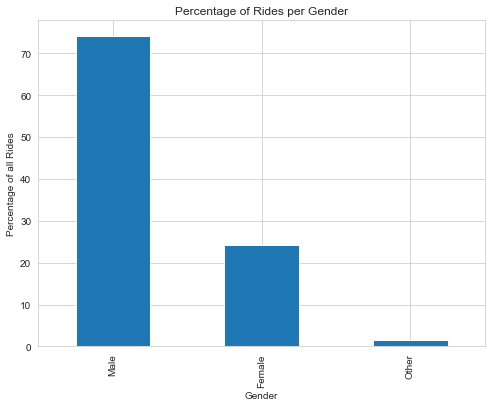

In [11]:
plt.figure(figsize=[8, 6])
(df.member_gender.value_counts(sort=True, normalize=True)*100).plot.bar(color = default_color);
plt.title("Percentage of Rides per Gender")
plt.ylabel("Percentage of all Rides")
plt.xlabel("Gender");

## Distribution of Age

The majority of rides have been done by user between 30 and 40 years.

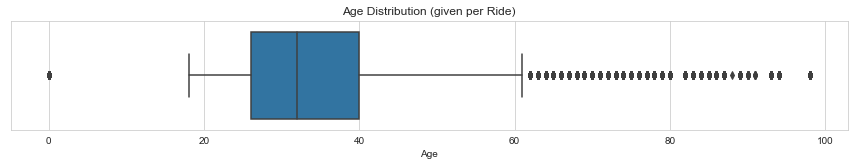

In [12]:
plt.figure(figsize=(15,2))
sb.boxplot(x='user_age', data = df, color = default_color);
plt.title("Age Distribution (given per Ride)")
plt.xlabel("Age");

## Distribution of Rides per Age Group and Gender

This graph shows how the amount of rides is distributed across the age groups. Most rides have been done by male users between 25-34 years.

In [14]:
df_male = df[(df.member_gender == "Male")]
df_female = df[(df.member_gender == "Female")]

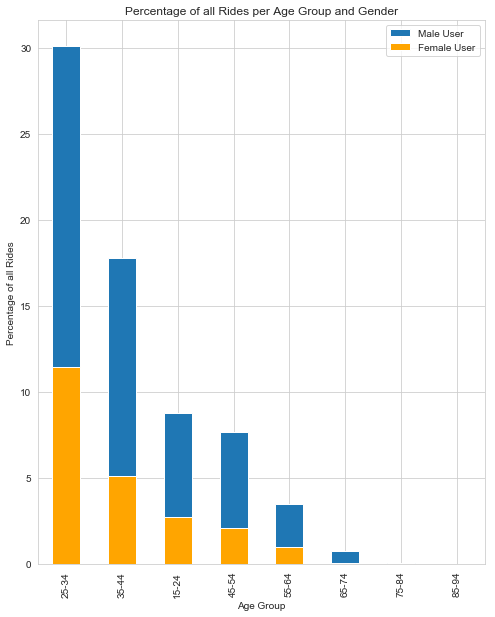

In [18]:
plt.figure(figsize=[8, 10])
(df_male.age_group.value_counts() / len(df)*100).plot.bar(color = default_color, label='Male User');
(df_female.age_group.value_counts() / len(df)*100).plot.bar(color = 'orange', label='Female User');
plt.legend(loc='upper right')
plt.title("Percentage of all Rides per Age Group and Gender")
plt.ylabel('Percentage of all Rides')
plt.xlabel('Age Group');

## Amount and Duration of Rides per Age Group and Gender

Male users between 25-34 years use the service most in terms of absolute amount of rides. This group also shows the highest total ride duration. Looking the other way around, it visualizes that the group of users between 45-54 years has very high potential for growth. These users still have sufficient physical abilities to use FordGoBike. More important however is, that the whole group of woman across all ages represent enormous (unused) business opportunities.

In [22]:
df_subscriber = df[(df.user_type == "Subscriber")]

df_subscriber_without_outliers = df_subscriber[(df_subscriber.duration_sec <= 14400)]

df_subscriber_female_male_without_outliers = df_subscriber_without_outliers[(df_subscriber_without_outliers.member_gender != "Other")]

ct_rides_subsriber = df_subscriber_female_male_without_outliers.groupby(['member_gender', 'age_group']).size()
ct_rides_subsriber = ct_rides_subsriber.reset_index(name = 'count')
ct_rides_subsriber = ct_rides_subsriber.pivot(index = 'age_group', columns = 'member_gender', values = 'count')

ct_duration_subsriber = df_subscriber_female_male_without_outliers.groupby(['member_gender', 'age_group'])['duration_sec'].agg('sum')
ct_duration_subsriber = ct_duration_subsriber
ct_duration_subsriber = ct_duration_subsriber.reset_index(name = 'duration_min')
ct_duration_subsriber = ct_duration_subsriber.pivot(index = 'age_group', columns = 'member_gender', values = 'duration_min')

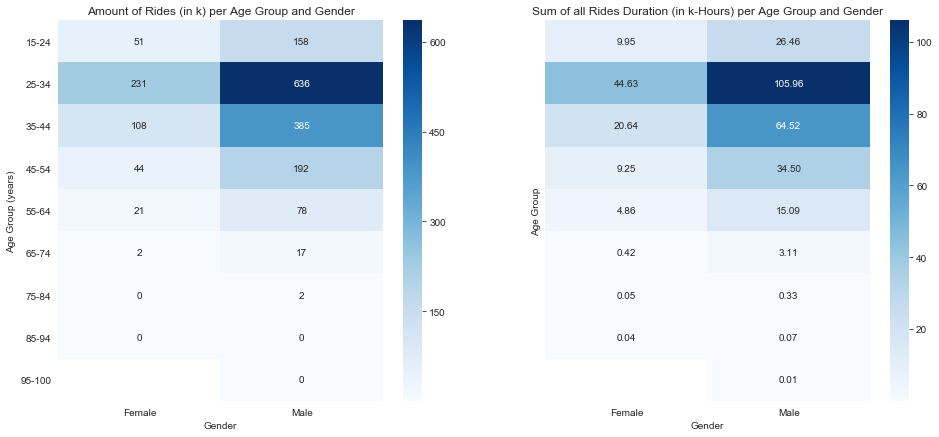

In [23]:
plt.figure(figsize = [16, 7])
plt.subplot(1, 2, 1)
sb.heatmap(ct_rides_subsriber/1000, annot = True, fmt =  '.0f',  cmap = 'Blues')
plt.title("Amount of Rides (in k) per Age Group and Gender")
plt.ylabel("Age Group (years)")
plt.xlabel("Gender")
plt.yticks(rotation=360)
plt.subplot(1, 2, 2)
sb.heatmap(ct_duration_subsriber/60/60/1000, annot = True, fmt =  '.2f',  cmap = 'Blues', yticklabels=False)
plt.title("Sum of all Rides Duration (in k-Hours) per Age Group and Gender")
plt.ylabel("Age Group")
plt.xlabel("Gender");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!